In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Getting data and preprocessing

In [2]:
df = pd.read_csv('----/train.csv')

In [3]:
df.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

In [5]:
df.describe()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
count,79023.000000,79023.000000,79023.000000,79023.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,64414.000000,...,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,78539.000000,79023.000000
mean,-1.891072,29.880155,2020.000000,26.000000,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5592.377478,59420.297456,4670.430869,19.139241,0.271460,-10.784832,40.436976,-86.800583,27.925981,81.940552
std,0.694522,0.810375,0.816502,15.297155,0.000272,0.185382,0.000206,0.071364,64.263368,14.149950,...,1428.503002,9051.163609,1359.251583,13.547047,0.049434,30.374462,6.428216,37.837269,4.403835,144.299648
min,-3.299000,28.228000,2019.000000,0.000000,-0.000996,0.241822,-0.000887,0.000000,-179.537059,0.099237,...,1050.661782,24779.033704,1050.496816,1.844529,0.017697,-102.739731,2.998873,-153.464211,10.818288,0.000000
25%,-2.451000,29.262000,2019.000000,13.000000,-0.000096,0.705817,-0.000078,0.110535,-56.782383,28.844520,...,4595.400519,53175.779928,3680.856344,9.974574,0.241453,-30.309170,35.829907,-125.991158,24.686763,9.797995
50%,-1.882000,29.883000,2020.000000,26.000000,0.000024,0.809118,0.000019,0.161855,-12.441726,37.784299,...,5573.854309,59332.532548,4621.755170,15.130688,0.272747,-12.673914,41.119630,-84.644352,28.333630,45.593445
75%,-1.303000,30.471000,2021.000000,39.000000,0.000153,0.942792,0.000121,0.211824,72.059990,47.634875,...,6542.303642,65663.842684,5572.983223,23.785030,0.302892,9.402202,44.446272,-48.132701,31.499883,109.549595
max,-0.510000,31.532000,2021.000000,52.000000,0.004191,1.885239,0.004236,0.299998,122.095200,66.242012,...,12384.239458,89291.615576,11384.239458,250.000000,0.736514,78.223037,65.951248,-22.653170,42.060436,3167.768000


In [6]:
df.isnull().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_sensor_azimuth_angle    484
Cloud_sensor_zenith_angle     484
Cloud_solar_azimuth_angle     484
Cloud_solar_zenith_angle      484
emission                        0
Length: 76, dtype: int64

In [7]:
# dropping unwanted columns like ID

x = df.drop(['ID_LAT_LON_YEAR_WEEK','emission'],axis = 1)
y = df[['emission']]
# y = df['emission'] this will return Series not dataframe

In [8]:
null_cols_numeric = []
for i in x.columns:
    if df[i].isnull().sum()>0 and x[i].dtype != 'object':
        null_cols_numeric.append(i)

#### Impute nan to mean(Avg)

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [10]:
x[null_cols_numeric] = pd.DataFrame(imputer.fit_transform(x[null_cols_numeric]))

#### standard scalling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
#two saperate scaler for x and y. So, we don't influence y by overfitting.

In [12]:
# Following step is for ease. So,I don't have to write long name in the function
cols = null_cols_numeric

In [13]:
x[cols] = pd.DataFrame(sc_x.fit_transform(x[cols]),columns = cols)

In [14]:
y = pd.DataFrame(sc_y.fit_transform(y),columns = y.columns)

### Train test split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 1)

### Modelling (Regression)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [17]:
MLR = LinearRegression() #Multiple Linear Regression
DTR = DecisionTreeRegressor(random_state = 1) #Decision Tree Regression
RFR = RandomForestRegressor(n_estimators = 20, random_state = 0) #Random Forest Regression
SV = SVR(kernel = 'rbf') #Support Vector Regression

In [18]:
MLR.fit(x_train,y_train)
DTR.fit(x_train,y_train)
RFR.fit(x_train,y_train) # we can hyper parameterise with max_depth and n_estimators
SV.fit(x_train,y_train)

<ipython-input-18-53e35095e784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR.fit(x_train,y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [19]:
pred_MLR = MLR.predict(x_test).reshape(-1,1)
pred_DTR = DTR.predict(x_test).reshape(-1,1)
pred_RFR = RFR.predict(x_test).reshape(-1,1)
pred_SV = SV.predict(x_test).reshape(-1,1)

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score #R2 (R square -  coefficient of determination)
from math import sqrt
print("******")
print("MAE (mean absolute error) of Multiple Linear regression Model = ",
      sqrt(mean_absolute_error(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_MLR))))
print("******")
print("MSE (mean squared error) of Multiple Linear regression Model = ",
      mean_squared_error(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_MLR), squared = True))
print("******")
print("RMSE ( root mean squared error) of Multiple Linear regression Model = ",
      mean_squared_error(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_MLR), squared = False))
print("******")
print("R2 score of Multiple Linear regression Model = ",
      r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_MLR)))


******
MAE (mean absolute error) of Multiple Linear regression Model =  8.279351354002294
******
MSE (mean squared error) of Multiple Linear regression Model =  17922.436257359564
******
RMSE ( root mean squared error) of Multiple Linear regression Model =  133.87470357524444
******
R2 score of Multiple Linear regression Model =  0.029775290634386886


In [48]:
print("******")
print("R2 score of Decision Tree Regression Model = ",
      r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_DTR)))
print("******")
print("R2 score of Random Forest Regression Model = ",
      r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_RFR)))
print("******")
print("R2 score of Support Vector Regression Model = ",
      r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_SV)))


******
R2 score of Decision Tree Regression Model =  0.9490219744659356
******
R2 score of Random Forest Regression Model =  0.9703264334670437
******
R2 score of Support Vector Regression Model =  -0.061607992203019046


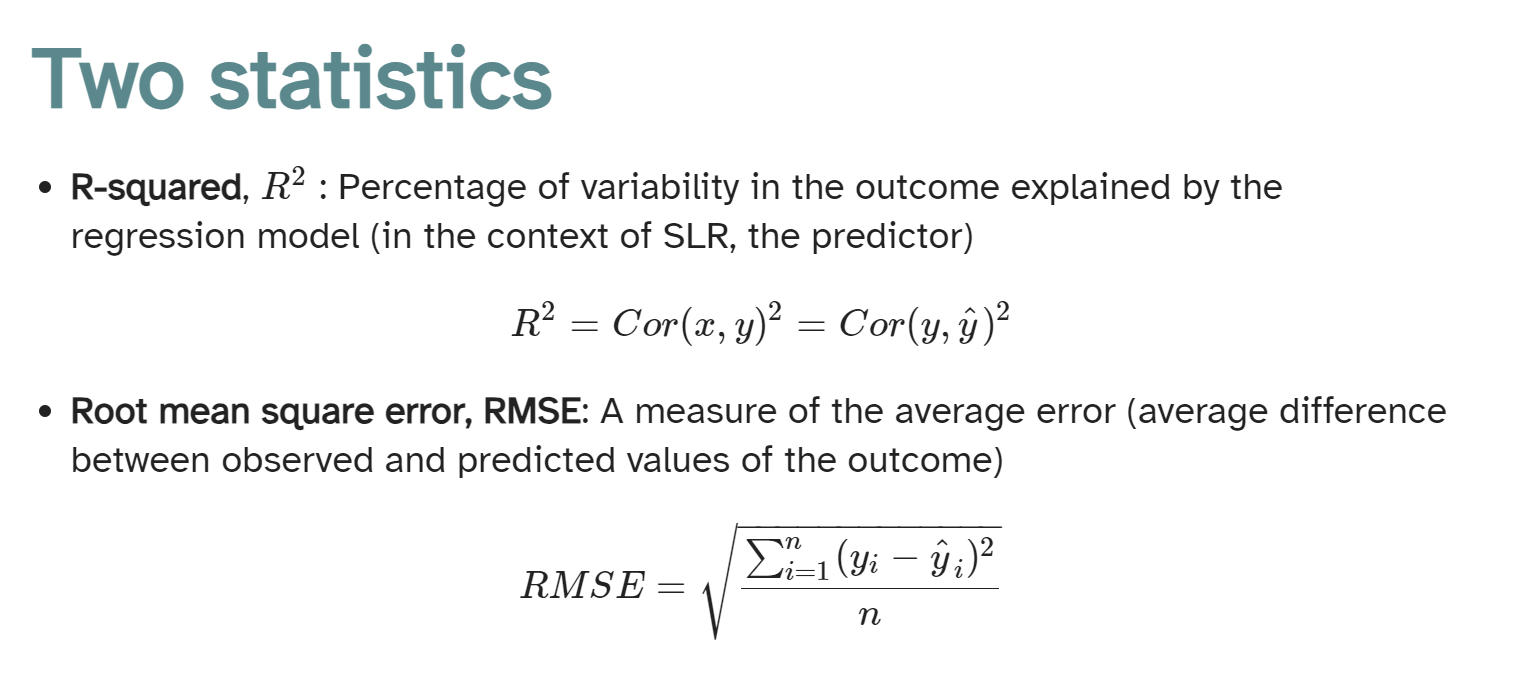

### Gradient Boosting Model

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor()

In [50]:
pred_GBR = GBR.predict(x_test).reshape(-1,1)
print("R2 score of Support Vector Regression Model =",
    r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_GBR)))

R2 score of Support Vector Regression Model = 0.7849010163366041


In [ ]:
#RMSE is reliable method to test score of regresion model. R2_score as well.

In [58]:
print("RMSE of Support Vector Regression Model =",
    mean_squared_error(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_GBR),squared=False))

RMSE of Support Vector Regression Model = 63.034967892758964


### XGB Model

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

In [24]:
from xgboost import XGBRegressor
XG = XGBRegressor()
XG.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# #hit cmd + / for uncomment and run

# #we can add evaluation metric like following
# XG = XGBRegressor(eval_metric = 'rmsle')
# XG = XGBRegressor(eval_metric = 'rmse')

# from sklearn.model_selection import GridSearchCV

# param_grid = {"max_depth": [4,5,6],
#            "n_estimators":[500,600,700],
#            "learning_rate":[0.01,0.015]}

# # try out every combination from above

# search = GridSearchCV(XG, param_grid, cv=5).fit(x_train,y_train)
# print("the best hyperparameter are", search.best_params_)

# #now try best parameter

# regressor = XGBRegressor(learning_rate = search.best_params_["learning_rate"],
#                         n_estimators = search.best_params_["n_estimators"],
#                         max_depth = search.best_params_["max_depth"],
#                         eval_metric = 'rmsle')
# regressor.fit(x_train,y_train)
# predictions = regressor.predict(x_test)

# #now test against the value (ground truth)

# from sklearn.metrics import mean_squared_log_error
# RMSLE = np.sqrt(mean_squared_log_error(y_test,predictions))
# print("the score is %.5f" %RMSLE)

NameError: name 'regressor' is not defined

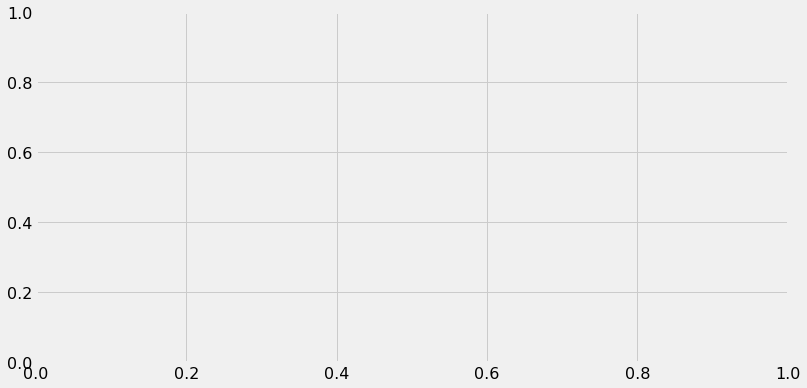

In [57]:
# #Now let's take a look at feature importance

# from xgboost import plot_importance
# import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
# plt.rcParams.update({'font.size':16})

# fig,ax = plt.subplots(figsize = (12,6))
# plot_importance(regressor, max_num_features = 8, ax=ax)
# plot.show()

In [51]:
pred_XG = XG.predict(x_test).reshape(-1,1)
print("R2 score of Support Vector Regression Model = ",
     r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_XG)))

R2 score of Support Vector Regression Model =  0.9745841093899686


### AdaBoost Model

In [26]:
from sklearn.ensemble import AdaBoostRegressor
ADA = AdaBoostRegressor()
ADA.fit(X = x_train, y = y_train, sample_weight=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostRegressor()

In [52]:
pred_ADA = ADA.predict(x_test).reshape(-1,1)
print("R2 score of Support Vector Regression Model = ",
     r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_ADA)))

R2 score of Support Vector Regression Model =  0.5620146778338535


### CatBoost Model

In [29]:
from catboost import CatBoostRegressor
CBR = CatBoostRegressor()
CBR.fit(x_train,y_train)

Learning rate set to 0.078034
0:	learn: 0.9827762	total: 164ms	remaining: 2m 44s
1:	learn: 0.9511517	total: 198ms	remaining: 1m 38s
2:	learn: 0.9207668	total: 229ms	remaining: 1m 15s
3:	learn: 0.9122267	total: 255ms	remaining: 1m 3s
4:	learn: 0.9031874	total: 281ms	remaining: 56s
5:	learn: 0.8658889	total: 309ms	remaining: 51.2s
6:	learn: 0.8424751	total: 336ms	remaining: 47.6s
7:	learn: 0.8236184	total: 364ms	remaining: 45.1s
8:	learn: 0.8179151	total: 394ms	remaining: 43.4s
9:	learn: 0.7940628	total: 423ms	remaining: 41.9s
10:	learn: 0.7742867	total: 456ms	remaining: 41s
11:	learn: 0.7621997	total: 488ms	remaining: 40.1s
12:	learn: 0.7574553	total: 514ms	remaining: 39s
13:	learn: 0.7427411	total: 542ms	remaining: 38.2s
14:	learn: 0.7318009	total: 573ms	remaining: 37.6s
15:	learn: 0.7276389	total: 605ms	remaining: 37.2s
16:	learn: 0.7231693	total: 634ms	remaining: 36.6s
17:	learn: 0.7090840	total: 662ms	remaining: 36.1s
18:	learn: 0.6993272	total: 688ms	remaining: 35.5s
19:	learn: 0.6

165:	learn: 0.3717479	total: 5.07s	remaining: 25.5s
166:	learn: 0.3706262	total: 5.1s	remaining: 25.4s
167:	learn: 0.3697420	total: 5.13s	remaining: 25.4s
168:	learn: 0.3669842	total: 5.16s	remaining: 25.4s
169:	learn: 0.3659257	total: 5.19s	remaining: 25.3s
170:	learn: 0.3653878	total: 5.22s	remaining: 25.3s
171:	learn: 0.3643791	total: 5.25s	remaining: 25.3s
172:	learn: 0.3624031	total: 5.28s	remaining: 25.2s
173:	learn: 0.3616818	total: 5.31s	remaining: 25.2s
174:	learn: 0.3605200	total: 5.33s	remaining: 25.1s
175:	learn: 0.3585311	total: 5.36s	remaining: 25.1s
176:	learn: 0.3581307	total: 5.39s	remaining: 25.1s
177:	learn: 0.3571104	total: 5.42s	remaining: 25s
178:	learn: 0.3564832	total: 5.45s	remaining: 25s
179:	learn: 0.3554691	total: 5.48s	remaining: 25s
180:	learn: 0.3549030	total: 5.51s	remaining: 24.9s
181:	learn: 0.3546116	total: 5.53s	remaining: 24.9s
182:	learn: 0.3537577	total: 5.56s	remaining: 24.8s
183:	learn: 0.3525602	total: 5.58s	remaining: 24.8s
184:	learn: 0.35187

324:	learn: 0.2678695	total: 9.9s	remaining: 20.6s
325:	learn: 0.2676134	total: 9.94s	remaining: 20.6s
326:	learn: 0.2669680	total: 9.97s	remaining: 20.5s
327:	learn: 0.2666395	total: 10s	remaining: 20.5s
328:	learn: 0.2664369	total: 10s	remaining: 20.5s
329:	learn: 0.2660625	total: 10.1s	remaining: 20.5s
330:	learn: 0.2655192	total: 10.1s	remaining: 20.4s
331:	learn: 0.2653131	total: 10.1s	remaining: 20.4s
332:	learn: 0.2647849	total: 10.2s	remaining: 20.4s
333:	learn: 0.2644548	total: 10.2s	remaining: 20.3s
334:	learn: 0.2640222	total: 10.2s	remaining: 20.3s
335:	learn: 0.2636883	total: 10.2s	remaining: 20.3s
336:	learn: 0.2635400	total: 10.3s	remaining: 20.2s
337:	learn: 0.2633708	total: 10.3s	remaining: 20.2s
338:	learn: 0.2629592	total: 10.4s	remaining: 20.2s
339:	learn: 0.2627856	total: 10.4s	remaining: 20.2s
340:	learn: 0.2621753	total: 10.4s	remaining: 20.1s
341:	learn: 0.2619473	total: 10.4s	remaining: 20.1s
342:	learn: 0.2617994	total: 10.5s	remaining: 20.1s
343:	learn: 0.261

484:	learn: 0.2203764	total: 15.1s	remaining: 16s
485:	learn: 0.2199971	total: 15.1s	remaining: 16s
486:	learn: 0.2198772	total: 15.1s	remaining: 15.9s
487:	learn: 0.2196701	total: 15.1s	remaining: 15.9s
488:	learn: 0.2194798	total: 15.2s	remaining: 15.8s
489:	learn: 0.2192870	total: 15.2s	remaining: 15.8s
490:	learn: 0.2190004	total: 15.2s	remaining: 15.8s
491:	learn: 0.2188847	total: 15.3s	remaining: 15.8s
492:	learn: 0.2186357	total: 15.3s	remaining: 15.7s
493:	learn: 0.2183524	total: 15.3s	remaining: 15.7s
494:	learn: 0.2179514	total: 15.4s	remaining: 15.7s
495:	learn: 0.2176165	total: 15.4s	remaining: 15.6s
496:	learn: 0.2174188	total: 15.4s	remaining: 15.6s
497:	learn: 0.2172770	total: 15.4s	remaining: 15.6s
498:	learn: 0.2168389	total: 15.5s	remaining: 15.5s
499:	learn: 0.2165808	total: 15.5s	remaining: 15.5s
500:	learn: 0.2165185	total: 15.5s	remaining: 15.5s
501:	learn: 0.2163210	total: 15.5s	remaining: 15.4s
502:	learn: 0.2161009	total: 15.6s	remaining: 15.4s
503:	learn: 0.21

647:	learn: 0.1885396	total: 20.8s	remaining: 11.3s
648:	learn: 0.1884472	total: 20.9s	remaining: 11.3s
649:	learn: 0.1883513	total: 20.9s	remaining: 11.3s
650:	learn: 0.1881547	total: 20.9s	remaining: 11.2s
651:	learn: 0.1880077	total: 21s	remaining: 11.2s
652:	learn: 0.1879663	total: 21s	remaining: 11.2s
653:	learn: 0.1876851	total: 21s	remaining: 11.1s
654:	learn: 0.1875500	total: 21.1s	remaining: 11.1s
655:	learn: 0.1873383	total: 21.1s	remaining: 11.1s
656:	learn: 0.1870741	total: 21.1s	remaining: 11s
657:	learn: 0.1870064	total: 21.1s	remaining: 11s
658:	learn: 0.1867955	total: 21.2s	remaining: 11s
659:	learn: 0.1866740	total: 21.2s	remaining: 10.9s
660:	learn: 0.1865199	total: 21.2s	remaining: 10.9s
661:	learn: 0.1863889	total: 21.3s	remaining: 10.9s
662:	learn: 0.1863035	total: 21.3s	remaining: 10.8s
663:	learn: 0.1861531	total: 21.3s	remaining: 10.8s
664:	learn: 0.1860206	total: 21.3s	remaining: 10.8s
665:	learn: 0.1858959	total: 21.4s	remaining: 10.7s
666:	learn: 0.1858267	to

810:	learn: 0.1691949	total: 25.8s	remaining: 6s
811:	learn: 0.1691668	total: 25.8s	remaining: 5.97s
812:	learn: 0.1690313	total: 25.8s	remaining: 5.94s
813:	learn: 0.1689829	total: 25.9s	remaining: 5.91s
814:	learn: 0.1689488	total: 25.9s	remaining: 5.88s
815:	learn: 0.1689070	total: 25.9s	remaining: 5.84s
816:	learn: 0.1688049	total: 25.9s	remaining: 5.81s
817:	learn: 0.1687731	total: 26s	remaining: 5.78s
818:	learn: 0.1686113	total: 26s	remaining: 5.75s
819:	learn: 0.1684925	total: 26s	remaining: 5.71s
820:	learn: 0.1684609	total: 26.1s	remaining: 5.68s
821:	learn: 0.1684306	total: 26.1s	remaining: 5.65s
822:	learn: 0.1683553	total: 26.1s	remaining: 5.62s
823:	learn: 0.1681894	total: 26.2s	remaining: 5.59s
824:	learn: 0.1681654	total: 26.2s	remaining: 5.55s
825:	learn: 0.1680960	total: 26.2s	remaining: 5.52s
826:	learn: 0.1679461	total: 26.2s	remaining: 5.49s
827:	learn: 0.1678649	total: 26.3s	remaining: 5.46s
828:	learn: 0.1677825	total: 26.3s	remaining: 5.43s
829:	learn: 0.1677670

973:	learn: 0.1558299	total: 30.7s	remaining: 818ms
974:	learn: 0.1557873	total: 30.7s	remaining: 787ms
975:	learn: 0.1557480	total: 30.7s	remaining: 755ms
976:	learn: 0.1557108	total: 30.7s	remaining: 724ms
977:	learn: 0.1555732	total: 30.8s	remaining: 692ms
978:	learn: 0.1555531	total: 30.8s	remaining: 660ms
979:	learn: 0.1555053	total: 30.8s	remaining: 629ms
980:	learn: 0.1553776	total: 30.8s	remaining: 597ms
981:	learn: 0.1553005	total: 30.9s	remaining: 566ms
982:	learn: 0.1552360	total: 30.9s	remaining: 534ms
983:	learn: 0.1552018	total: 30.9s	remaining: 503ms
984:	learn: 0.1551555	total: 30.9s	remaining: 471ms
985:	learn: 0.1550984	total: 31s	remaining: 440ms
986:	learn: 0.1549973	total: 31s	remaining: 408ms
987:	learn: 0.1549380	total: 31s	remaining: 377ms
988:	learn: 0.1548418	total: 31.1s	remaining: 345ms
989:	learn: 0.1547303	total: 31.1s	remaining: 314ms
990:	learn: 0.1547093	total: 31.1s	remaining: 282ms
991:	learn: 0.1546471	total: 31.1s	remaining: 251ms
992:	learn: 0.1545

In [53]:
pred_CBR = CBR.predict(x_test).reshape(-1,1)
print("R2 score of Support Vector Regression Model = ",
     r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_CBR)))

R2 score of Support Vector Regression Model =  0.9702338897756159


### LGBM Model

In [55]:
from lightgbm import LGBMRegressor
LGB = LGBMRegressor()
LGB.fit(x_train,y_train)

TypeError: cpu_count() got an unexpected keyword argument 'only_physical_cores'

In [54]:
pred_LGB = LGB.predict(x_test).reshape(-1,1)
print("R2 score of Support Vector Regression Model = ",
    r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_LGB)))

NotFittedError: Estimator not fitted, call fit before exploiting the model.

### Ridge

In [35]:
from sklearn.linear_model import Ridge
RID = Ridge()
RID.fit(x_train,y_train)

Ridge()

In [56]:
pred_RID = RID.predict(x_test).reshape(-1,1)
print("R2 score of Support Vector Regression Model = ",
     r2_score(sc_y.inverse_transform(y_test),sc_y.inverse_transform(pred_RID)))

R2 score of Support Vector Regression Model =  0.029770030787004798


## Prediction

In [37]:
df_test = pd.read_csv('-----/test.csv')

In [38]:
df_test.isnull().sum()

ID_LAT_LON_YEAR_WEEK            0
latitude                        0
longitude                       0
year                            0
week_no                         0
                             ... 
Cloud_surface_albedo          166
Cloud_sensor_azimuth_angle    166
Cloud_sensor_zenith_angle     166
Cloud_solar_azimuth_angle     166
Cloud_solar_zenith_angle      166
Length: 75, dtype: int64

In [39]:
null_cols_test = []
for i in df_test.columns:
    if df_test[i].isnull().sum()>0 and df_test[i].dtype != 'object':
        null_cols_test.append(i)

In [40]:
df_test[null_cols_test] = pd.DataFrame(imputer.fit_transform(df_test[null_cols_test]))

In [42]:
df_test[null_cols_test] = pd.DataFrame(sc_x.transform(df_test[cols]),columns = cols)

In [43]:
id = df_test['ID_LAT_LON_YEAR_WEEK']
pred = RFR.predict(df_test.drop(['ID_LAT_LON_YEAR_WEEK'],axis = 1)).reshape(-1,1)
final_dict = {'ID_LAT_LON_YEAR_WEEK':id,'emission':sc_y.inverse_transform(pred).ravel()}

In [44]:
final_dict

{'ID_LAT_LON_YEAR_WEEK': 0        ID_-0.510_29.290_2022_00
 1        ID_-0.510_29.290_2022_01
 2        ID_-0.510_29.290_2022_02
 3        ID_-0.510_29.290_2022_03
 4        ID_-0.510_29.290_2022_04
                    ...           
 24348    ID_-3.299_30.301_2022_44
 24349    ID_-3.299_30.301_2022_45
 24350    ID_-3.299_30.301_2022_46
 24351    ID_-3.299_30.301_2022_47
 24352    ID_-3.299_30.301_2022_48
 Name: ID_LAT_LON_YEAR_WEEK, Length: 24353, dtype: object,
 'emission': array([ 3.85002071,  4.16167553,  4.1656824 , ..., 27.284999  ,
        27.1670284 , 26.63237925])}